In this notebook we read in the Master XML file made using NapaTrackMater and create N, Delta times Attribute dimensional vectors. N being the number of tracks present in the chosen region, R, Delta being the chosen time interval (t_minus + t_plus) {t - t_minus, t + t_plus} and Attributes being the morphological and the dynamic properties associated with cells in the tracks. We concatenate the Attribute componenets over the chosen time interval to create a Delta times Attribute dimensional vector and create a pandas dataframe with these vectors for further analysis.

In [ ]:
!pip install napatrackmater
!pip install git+https://github.com/kapoorlab/cellshape-helper
!pip install git+https://github.com/kapoorlab/cellshape-cloud
!pip install git+https://github.com/kapoorlab/cellshape-cluster    

In [1]:
%gui qt5
from napatrackmater.Trackvector import TrackVector
from pathlib import Path
from ipywidgets import interactive, widgets
from IPython.display import display
import napari 
from tifffile import imread
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
master_xml_path = Path('C:/Users/rando/Downloads/Mari_project/gt/master_gt_star_hyperstack.xml')
spot_csv_path = Path('C:/Users/rando/Downloads/Mari_project/gt/spots.csv')
track_csv_path = Path('C:/Users/rando/Downloads/Mari_project/gt/tracks.csv')
edges_csv_path = Path('C:/Users/rando/Downloads/Mari_project/gt/edges.csv')
image = imread('C:/Users/rando/Downloads/Mari_project/gt/rawk.tif')
show_tracks = False

In [3]:
if show_tracks:
  viewer = napari.Viewer()
else:
    viewer = None
track_vectors = TrackVector(viewer,image,master_xml_path,spot_csv_path, track_csv_path, edges_csv_path, show_tracks = show_tracks)

Reading Master XML
Iterating over spots in frame
Iterating over tracks 547
getting attributes
obtianed spot attributes
obtained track attributes
obtained edge attributes


In [4]:
def track_setter(deltat, deltax, deltay):
    track_vectors.t_minus = deltat[0]
    track_vectors.t_plus = deltat[-1]
    
    track_vectors.x_start = deltax[0]
    track_vectors.x_end = deltax[-1]
    
    track_vectors.y_start = deltay[0]
    track_vectors.y_end = deltay[-1]
    

In [5]:
track_vector_widgets = interactive(track_setter, deltat = widgets.IntRangeSlider(
    value=[track_vectors.tstart, track_vectors.tend],
    min= track_vectors.tstart,
    max=track_vectors.tend,
    step=1,
    description='Delta Time',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
), 
    deltax = widgets.IntRangeSlider(
    value=[track_vectors.xmin, track_vectors.xmax],
    min= track_vectors.xmin,
    max=track_vectors.xmax,
    step=1,
    description='Delta X',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
), 
    deltay = widgets.IntRangeSlider(
    value=[track_vectors.ymin, track_vectors.ymax],
    min= track_vectors.ymin,
    max=track_vectors.ymax,
    step=1,
    description='Delta Y',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
),                               
                                  
                                  )

track_vector_widgets

interactive(children=(IntRangeSlider(value=(0, 265), continuous_update=False, description='Delta Time', max=26…

In [6]:
track_vectors._interactive_function()

(54,) (54,)
(33,) (33,)
(61,) (61,)
(5,) (5,)
(3,) (3,)
(5,) (5,)
(5,) (5,)
(34,) (34,)
(15,) (15,)
(2,) (2,)
(43,) (43,)
(2,) (2,)
(1,) (1,)
(21,) (21,)
(3,) (3,)
(6,) (6,)
(2,) (2,)
(60,) (60,)
(10,) (10,)
(17,) (17,)
(16,) (16,)
(15,) (15,)
(33,) (33,)
(2,) (2,)
(14,) (14,)
(15,) (15,)
(18,) (18,)
(18,) (18,)
(37,) (37,)
(2,) (2,)
(2,) (2,)
(4,) (4,)
(3,) (3,)
(4,) (4,)
(11,) (11,)
(2,) (2,)
(8,) (8,)
(49,) (49,)
(8,) (8,)
(53,) (53,)
(18,) (18,)
(7,) (7,)
(10,) (10,)
(7,) (7,)
(4,) (4,)
(6,) (6,)
(45,) (45,)
(2,) (2,)
(11,) (11,)
(4,) (4,)
(64,) (64,)
(32,) (32,)
(2,) (2,)
(13,) (13,)
(5,) (5,)
(2,) (2,)
(8,) (8,)
(3,) (3,)
(5,) (5,)
(33,) (33,)
(9,) (9,)
(10,) (10,)
(51,) (51,)
(15,) (15,)
(25,) (25,)
(11,) (11,)
(28,) (28,)
(24,) (24,)
(28,) (28,)
(20,) (20,)
(3,) (3,)
(19,) (19,)
(8,) (8,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(10,) (10,)
(34,) (34,)
(16,) (16,)
(39,) (39,)
(13,) (13,)
(40,) (40,)
(13,) (13,)
(18,) (18,)
(14,) (14,)
(55,) (55,)
(5,) (5,)
(20,) (20,)


In [7]:
current_shape_vectors = track_vectors.current_shape_vectors
current_dynamic_vectors = track_vectors.current_dynamic_vectors
current_shape_dynamic_vectors = track_vectors.current_shape_dynamic_vectors


In [8]:
global_shape_dataframe = []
for i in range(len(current_shape_vectors)):
  
   shape_dataframe = pd.DataFrame(current_shape_vectors[i], index =['Time', 'Track ID', 'Dividing', 'Number_Dividing', 'Radius', 'Volume', 'Cluster Class'])
   if len(global_shape_dataframe) == 0:
        global_shape_dataframe = shape_dataframe
   else:
        global_shape_dataframe = pd.concat([global_shape_dataframe, shape_dataframe],ignore_index=True)
print(global_shape_dataframe.shape)        


(4326, 165)


In [9]:
global_dynamic_dataframe = []
for i in range(len(current_dynamic_vectors)):
   dynamic_dataframe = pd.DataFrame(current_dynamic_vectors[i], index =['Time', 'Track ID',  'Dividing', 'Number_Dividing',  'Speed', 'Directional_Change_Rate', 'Acceleration'])
   if len(global_dynamic_dataframe) == 0:
        global_dynamic_dataframe = dynamic_dataframe
   else:
        global_dynamic_dataframe = pd.concat([global_dynamic_dataframe, dynamic_dataframe],ignore_index=True)


In [10]:
global_shape_dynamic_dataframe = []
for i in range(len(current_shape_dynamic_vectors)):
   shape_dynamic_dataframe = pd.DataFrame(current_shape_dynamic_vectors[i], index =['Time', 'Track ID',  'Dividing', 'Number_Dividing',  'Radius', 'Volume', 'Cluster Class', 'Speed', 'Directional_Change_Rate', 'Acceleration'])
   if len(global_shape_dynamic_dataframe) == 0:
        global_shape_dynamic_dataframe = shape_dynamic_dataframe
   else:
        global_shape_dynamic_dataframe = pd.concat([global_shape_dynamic_dataframe, shape_dynamic_dataframe],ignore_index=True)


In [39]:
dividing_property = []
radius_property = []
for i in range(len(current_shape_dynamic_vectors)):
    current_dividing_array = current_shape_dynamic_vectors[i][3]
    current_radius_array = current_shape_dynamic_vectors[i][9]
    
    for i in range(current_dividing_array.shape[0]):
       dividing_property.append(current_dividing_array[i])
    for i in range(current_radius_array.shape[0]):                
       radius_property.append(current_radius_array[i])

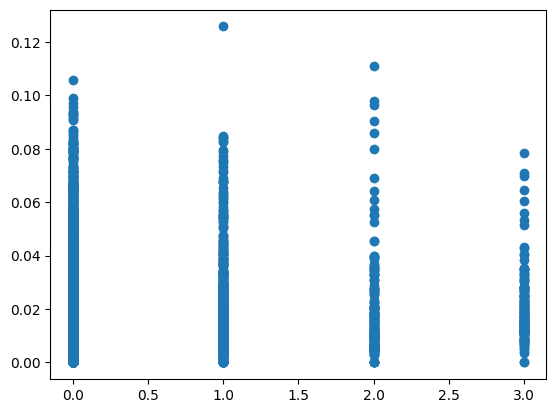

In [40]:
plt.scatter(np.asarray(dividing_property), np.asarray(radius_property))